# 12.2 Project


In [191]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv(r'Video_Games_Sales_as_at_22_Dec_2016.csv')


In [3]:
# Sample of the data
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Summary Stats for all relevant columns
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [5]:
# df Summary Types
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [6]:
len(df.index)

16719

In [7]:
#df['Year_of_Release'] = df['Year_of_Release'].astype('int')
# Show Missing Values
# Sum of missing values
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [8]:
df_clean = df
df_clean.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [9]:
df_clean.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Code to replace missing values with NAN take from:
#        https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas

# Remove NA Name rows without a name
df_clean['Year_of_Release'] = df['Year_of_Release'].replace(r'^\s+$', np.nan, regex=True)
df_clean['Critic_Score'] = df['Critic_Score'].replace(r'^\s+$', np.nan, regex=True)
df_clean['Critic_Count'] = df['Critic_Count'].replace(r'^\s+$', np.nan, regex=True)
df_clean['User_Score'] = df['User_Score'].replace(r'^\s+$', np.nan, regex=True)
df_clean['User_Count'] = df['User_Count'].replace(r'^\s+$', np.nan, regex=True)

df_clean = (df.dropna(subset=['Name']))

df_clean['Publisher'] = df['Publisher'].replace(r'^\s+$', 'np.nan', regex=True)
df_clean['Developer'] = df['Developer'].replace(r'^\s+$', 'np.nan', regex=True)
df_clean['Rating'] = df['Rating'].replace(r'^\s+$', 'np.nan', regex=True)



C:\Users\darge\AppData\Local\Temp/ipykernel_45228/4231950845.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Publisher'] = df['Publisher'].replace(r'^\s+$', 'np.nan', regex=True)
C:\Users\darge\AppData\Local\Temp/ipykernel_45228/4231950845.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Developer'] = df['Developer'].replace(r'^\s+$', 'np.nan', regex=True)
C:\Users\darge\AppData\Local\Temp/ipykernel_45228/4231950845.py:15: SettingWithCopyWarning: 
A value is trying to be set on 

In [ ]:
#df_clean['Year_of_Release'] = df['Year_of_Release'].astype('int')
#df_clean['Critic_Score'] = df['Critic_Score'].astype('float')
#df_clean['Critic_Count'] = df['Critic_Count'].astype('int')
#df_clean['User_Score'] = df['User_Score'].astype('float')
#df_clean['User_Count'] = df['User_Count'].astype('int')

In [11]:


#df_clean['Developer'] = df['Developer'].fillna('unknown', inplace = True)
#df_clean['Rating'] = df['Rating'].fillna('U', inplace = True)

df_clean.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


# Data validation check

No missing values.  Missing 'Name' values removed from dataframe. 'Year_of_Release','Critic_Score','Critic_Count','User_Score','User_Count' missing values replaced with 0.  These values are replaced with 0 to show that no scores or count exists.  The source data does not contain score ranges that contain 0.

Publisher and Developer missing values replaced with unknown.  Rating missing values replaced with U for unknown.

The number of rows should be 16717 from the removal of 2 unknown game names.  The source data has 16719 rows.

In [12]:
df_clean.isnull().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8580
Critic_Count       8580
User_Score         9127
User_Count         9127
Developer          6621
Rating             6767
dtype: int64

In [ ]:
# Row check
len(df_clean.index)

In [13]:
# Sample of the cleansed dataframe
df_clean.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# dtype check

df_clean.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [15]:
df_clean.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16448.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.488996,0.263255,0.145010,0.077610,0.047333,0.533462,68.967679,26.360821,7.125046,162.229908
std,5.877470,0.813475,0.503303,0.308836,0.186721,1.547956,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [19]:
df_clean.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


# Histogram

In [73]:
#Creates a dataframe for genre, platform, publisher, developer,ESRB rating.  Counts the number of times each genre appears
# https://re-thought.com/pandas-value_counts/#:~:text=If%20you%20want%20to%20have,value_counts()%20.&text=If%20you%20need%20to%20name,in%20a%20slightly%20different%20way.

#df_genre = pd.DataFrame
df_genre = df_clean['Genre'].value_counts().to_frame()
df_genre = df_genre.reset_index()
df_genre.columns = ['Genre', "Genre_Counts"] 
df_genre

df_platform = df_clean['Platform'].value_counts().to_frame()
df_platform = df_platform.reset_index()
df_platform.columns = ['Platform', "Platform_Counts"] 
df_platform

df_publisher = df_clean['Publisher'].value_counts().to_frame()
df_publisher = df_publisher.reset_index()
df_publisher.columns = ['Publisher', "Publisher_Counts"] 
df_publisher_top20 = df_publisher.head(21)
df_publisher_top20

df_developer = df_clean['Developer'].value_counts().to_frame()
df_developer = df_developer.reset_index()
df_developer.columns = ['Developer', "Developer_Counts"] 
df_developer_top20 = df_developer.head(21)
df_developer_top20

df_rating = df_clean['Rating'].value_counts().to_frame()
df_rating = df_rating.reset_index()
df_rating.columns = ['Rating', "Rating_Counts"] 
df_rating

# df_platform = df_clean['Platform'].value_counts().to_frame()
# df_platform = df_platform.reset_index()
# df_platform.columns = ['Platform', "Platform_Counts"] 
# df_platform
# df_genre.dtypes
# df_genre.hist(column = 'Genre')

,Rating,Rating_Counts
0,E,3991
1,T,2961
2,M,1563
3,E10+,1420
4,EC,8
5,K-A,3
6,RP,3
7,AO,1


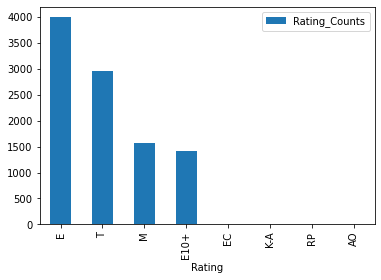

In [74]:
df_rating = df_rating.plot.bar(x = 'Rating')

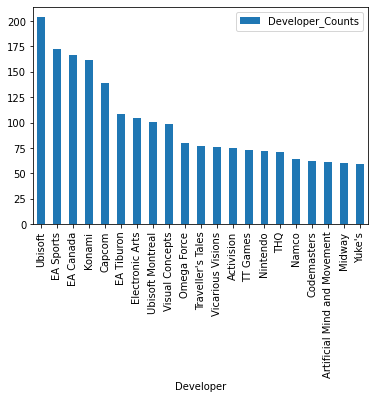

In [72]:
df_developer_top20 = df_developer_top20.plot.bar(x = 'Developer')

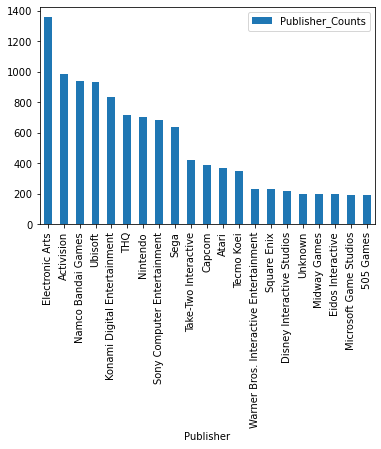

In [69]:
df_publisher_top20 = df_publisher_top20.plot.bar(x = 'Publisher')

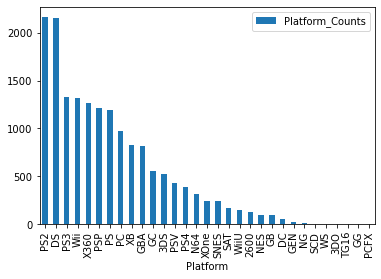

In [59]:
df_platform_bar = df_platform.plot.bar(x = 'Platform')

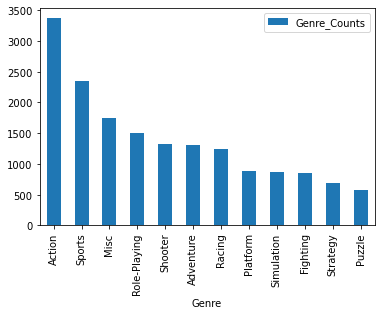

In [53]:
df_genre_bar = df_genre.plot.bar(x = 'Genre')

array([[<AxesSubplot:title={'center':'Global_Sales'}>]], dtype=object)

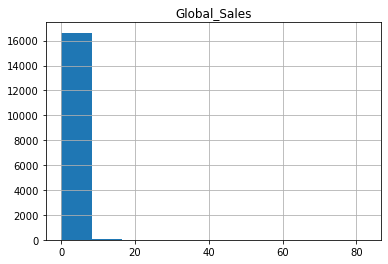

In [82]:
 df_clean.hist(column = 'Global_Sales')

array([[<AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

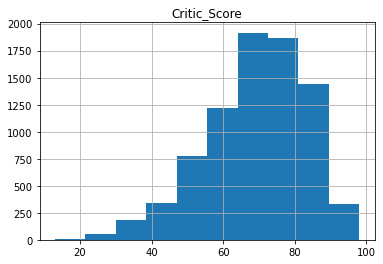

In [83]:
df_clean.hist(column = 'Critic_Score')

array([[<AxesSubplot:title={'center':'User_Score'}>]], dtype=object)

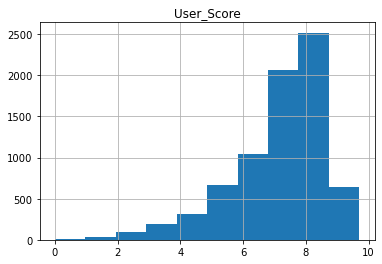

In [94]:
df_clean.hist(column = 'User_Score')


array([[<AxesSubplot:title={'center':'Year_of_Release'}>]], dtype=object)

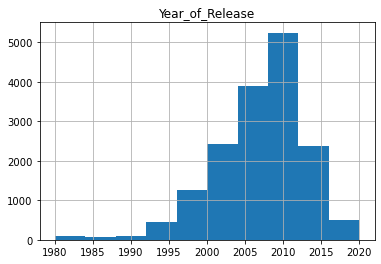

In [85]:
df_clean.hist(column = 'Year_of_Release')

In [89]:
df_genre['Genre_Counts'].mean()

1393.0833333333333

# Descriptive Stats

In [90]:

df_clean.describe().round(2)

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16448.00,16717.00,16717.00,16717.00,16717.00,16717.00,8137.00,8137.00,7590.00,7590.00
mean,2006.49,0.26,0.15,0.08,0.05,0.53,68.97,26.36,7.13,162.23
std,5.88,0.81,0.50,0.31,0.19,1.55,13.94,18.98,1.50,561.28
min,1980.00,0.00,0.00,0.00,0.00,0.01,13.00,3.00,0.00,4.00
25%,2003.00,0.00,0.00,0.00,0.00,0.06,60.00,12.00,6.40,10.00
50%,2007.00,0.08,0.02,0.00,0.01,0.17,71.00,21.00,7.50,24.00
75%,2010.00,0.24,0.11,0.04,0.03,0.47,79.00,36.00,8.20,81.00
max,2020.00,41.36,28.96,10.22,10.57,82.53,98.00,113.00,9.70,10665.00


# Probability Mass Function (PMF)

Compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

<AxesSubplot:title={'center':'User Score'}, ylabel='Density'>

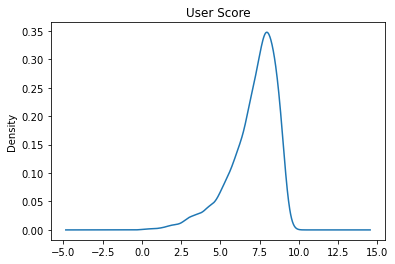

In [117]:
user_score_pmf = df_clean['User_Score'].plot(kind = 'density', title = "User Score")
user_score_pmf


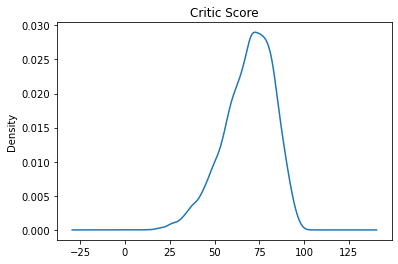

In [121]:
critic_score_pmf = df_clean['Critic_Score'].plot(kind = 'density', title = "Critic Score")

In [138]:
# Critic Scores above 80 vs everything else
critic_score_above_80 = df_clean[df_clean.Critic_Score > 80] 

critic_score_above_80['Global_Sales'].sum() 

2720.45

In [140]:
critic_score_lower_80 = df_clean[df_clean.Critic_Score < 80]

critic_score_lower_80['Global_Sales'].sum()

2611.39

C:\Users\darge\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\darge\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:title={'center':'PMF Global Sales for Critic Score Above 80'}, ylabel='Density'>

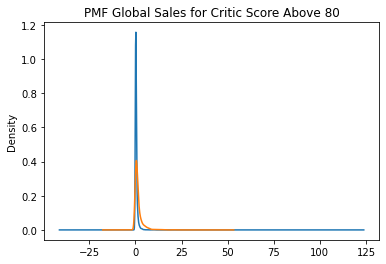

In [190]:
critic_score_lower_80.rename(columns = {'Global_Sales': 'Global_Sales_Below_80'}, inplace = True)
critic_score_lower_80['Global_Sales_Below_80'].plot(kind = 'density', title = "PMF Global Sales for Critic Score lower than 80")

critic_score_above_80.rename(columns = {'Global_Sales': 'Global_Sales_Above_80'}, inplace = True)
critic_score_above_80['Global_Sales_Above_80'].plot(kind = 'density', title = "PMF Global Sales for Critic Score Above 80")

In [158]:
#sales_total = [['Global_Sales_Above_80','Global_Sales_Below_80']].plot(kind = 'density', title = "PMF Global Sales")
# sales_total

# Cumulative Distribution Functions
Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

array([[<AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

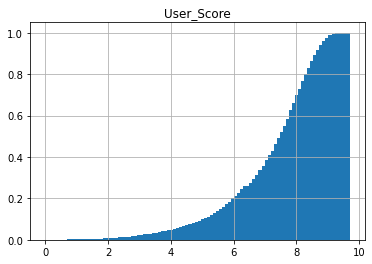

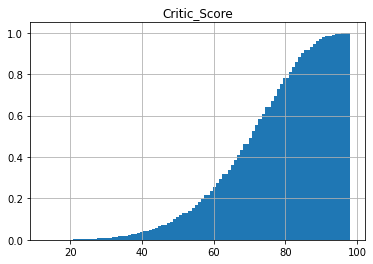

In [184]:
# https://stackoverflow.com/questions/25577352/plotting-cdf-of-a-pandas-series-in-python

df_clean.hist(column = 'User_Score', cumulative = True, density = 1, bins = 100)
df_clean.hist(column = 'Critic_Score', cumulative = True, density = 1, bins = 100)

# Analytical Distribution

Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).



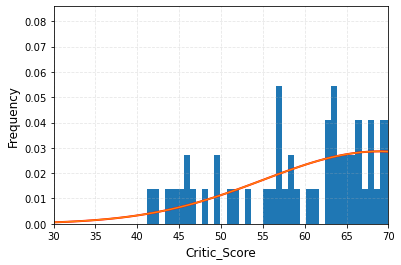

In [199]:
# Normal Distribution
# https://stackoverflow.com/questions/71287607/how-to-make-a-normal-distribution-graph-from-data-frame-in-python

# Calculating the mean and standard deviation of the parameter "Critic_Score":
mean = df_clean["Critic_Score"].mean()
std = df_clean["Critic_Score"].std()
s = np.random.normal(mean, std, 100) 

# This mean and standard deviation will be useful to create the normal distribution graph

# Creating the normal distribution graph for the column "Global_Sales"
count, bins, ignored = plt.hist(s, 100, density=True)

# Mathematical representation/formula of the normal distribution
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
                       np.exp( - (bins - mean)**2 / (2 * std**2) ),
                 linewidth=2, color='r')

# This is the direct function used in stats
pdf = stats.norm.pdf(df_clean["Critic_Score"].sort_values(), mean, std)
plt.plot(df_clean["Critic_Score"].sort_values(), pdf)
plt.xlabel("Critic_Score", size=12)
plt.ylabel("Frequency", size=12)
plt.xlim([30,70]) 
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

# Scatter Plots
Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).


<AxesSubplot:xlabel='Critic_Score', ylabel='Global_Sales'>

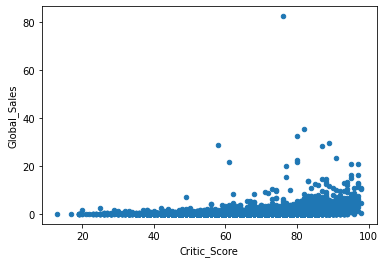

In [222]:
# Critic Score correlation with Global Sales
df_clean.plot.scatter(x= 'Critic_Score', y='Global_Sales')

<AxesSubplot:xlabel='User_Score', ylabel='Global_Sales'>

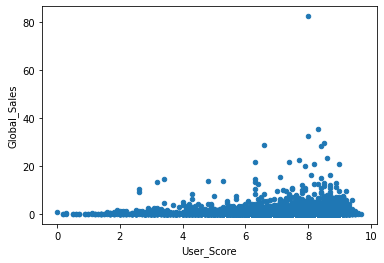

In [221]:
# User Score correlation with Global Sales
df_clean.plot.scatter(x= 'User_Score', y ='Global_Sales')

#Test
Conduct a test on your hypothesis using one of the methods covered in Chapter 9.


In [208]:
# Example of the Shapiro-Wilk Normality Test
# https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

# The test below shows that the data from Critic Score is normally distributed.  
# This helps determine the bell curve (of which it is normaly distributed)
from scipy.stats import shapiro


stat, p = shapiro(df_clean['Critic_Score'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=nan, p=1.000
Probably Gaussian


# Regression Analysis
For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [219]:
# https://www.youtube.com/watch?v=IsRRvEoIQ4k

from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

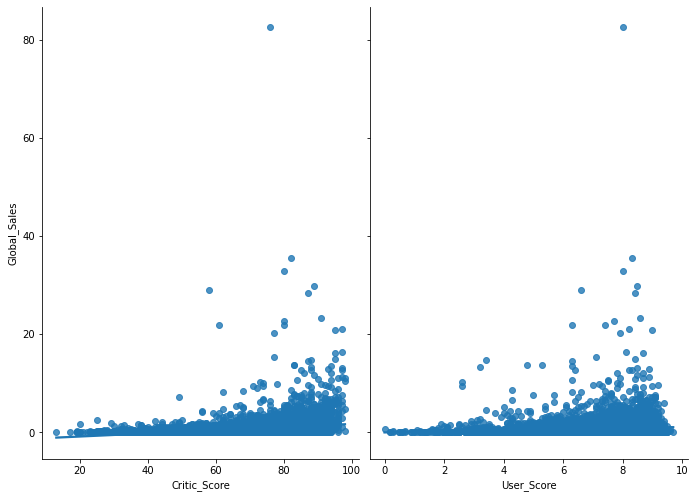

In [225]:
sns.pairplot(df_clean, x_vars= ['Critic_Score', 'User_Score'], y_vars = 'Global_Sales', height = 7, aspect = 0.7, kind='reg')

In [233]:
feature_cols = ['Critic_Score', 'User_Score']

In [234]:
X = df_clean[feature_cols]

In [238]:
X = df_clean[['Critic_Score', 'User_Score']]

In [239]:
X

,Critic_Score,User_Score
0,76.0,8.0
1,NaN,NaN
2,82.0,8.3
3,80.0,8.0
4,NaN,NaN
...,...,...
16714,NaN,NaN
16715,NaN,NaN
16716,NaN,NaN
16717,NaN,NaN


In [242]:
Y = df_clean['Global_Sales']

In [243]:
Y

0        82.53
1        40.24
2        35.52
3        32.77
4        31.37
         ...  
16714     0.01
16715     0.01
16716     0.01
16717     0.01
16718     0.01
Name: Global_Sales, Length: 16717, dtype: float64

In [244]:
from sklearn.model_selection import train_test_split

In [262]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=1) 

In [277]:
X[['Critic_Score', 'User_Score']].replace('nan', 0)
Y.fillna(0)

0        82.53
1        40.24
2        35.52
3        32.77
4        31.37
         ...  
16714     0.01
16715     0.01
16716     0.01
16717     0.01
16718     0.01
Name: Global_Sales, Length: 16717, dtype: float64

In [278]:
print(X_train)

       Critic_Score  User_Score
9872           69.0         7.1
13024           NaN         NaN
11647           NaN         NaN
13673          58.0         3.8
11494          62.0         NaN
...             ...         ...
7814           69.0         NaN
10956           NaN         NaN
5193            NaN         NaN
12173          57.0         8.8
235            86.0         8.4

[12537 rows x 2 columns]


In [269]:
print(Y_train)

9872     0.12
13024    0.05
11647    0.08
13673    0.04
11494    0.08
         ... 
7814     0.19
10956    0.09
5193     0.36
12173    0.07
235      4.59
Name: Global_Sales, Length: 12537, dtype: float64


In [270]:
print(X_test.shape)

(4180, 2)


In [271]:
from sklearn.linear_model import LinearRegression

In [272]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').